# Correlation of Data with MERRA2


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [2]:
import datetime
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [3]:
import datetime as dt

In [4]:
object_name='HD14943'
infos='ctioNov2016'

In [5]:
OBS_NAME='CTIO'
MONTH_NAME='11'

In [6]:
logfile='logbk_'+object_name+'_'+infos+'.csv'

In [9]:
df_data=pd.read_csv(logfile)
df_data.index=df_data['date']

In [10]:
df_data

,Unnamed: 0,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
date,,,,,,,,,,,,
2016-11-23T01:45:29.665,0,1,1.101,2016-11-23T01:45:29.665,2016_11_23T01_45_51,20.0,24.718000,9.0,776.0,64.0,5.400000,1.522
2016-11-23T01:46:33.179,1,2,1.100,2016-11-23T01:46:33.179,2016_11_23T01_46_55,20.0,24.613001,9.0,776.0,64.0,6.600000,1.371
2016-11-23T01:47:36.699,2,3,1.099,2016-11-23T01:47:36.699,2016_11_23T01_47_58,20.0,24.509001,9.0,776.0,64.0,7.800000,1.399
2016-11-23T01:52:00.166,3,4,1.095,2016-11-23T01:52:00.166,2016_11_23T01_52_42,40.0,24.090000,8.9,776.0,64.0,5.000000,1.357
2016-11-23T01:53:23.679,4,5,1.094,2016-11-23T01:53:23.679,2016_11_23T01_54_05,40.0,23.961000,8.9,776.0,64.0,4.500000,1.304
2016-11-23T01:54:47.200,5,6,1.093,2016-11-23T01:54:47.200,2016_11_23T01_55_29,40.0,23.834000,9.0,776.0,64.0,6.000000,1.409
2016-11-23T02:26:40.568,6,7,1.075,2016-11-23T02:26:40.568,2016_11_23T02_27_22,40.0,21.587999,8.7,776.0,66.0,7.800000,1.713
2016-11-23T02:28:04.083,7,8,1.075,2016-11-23T02:28:04.083,2016_11_23T02_28_46,40.0,21.523001,8.7,776.0,66.0,10.000000,2.030
2016-11-23T02:29:27.596,8,9,1.074,2016-11-23T02:29:27.596,2016_11_23T02_30_09,40.0,21.459000,8.7,776.0,66.0,9.500000,2.288


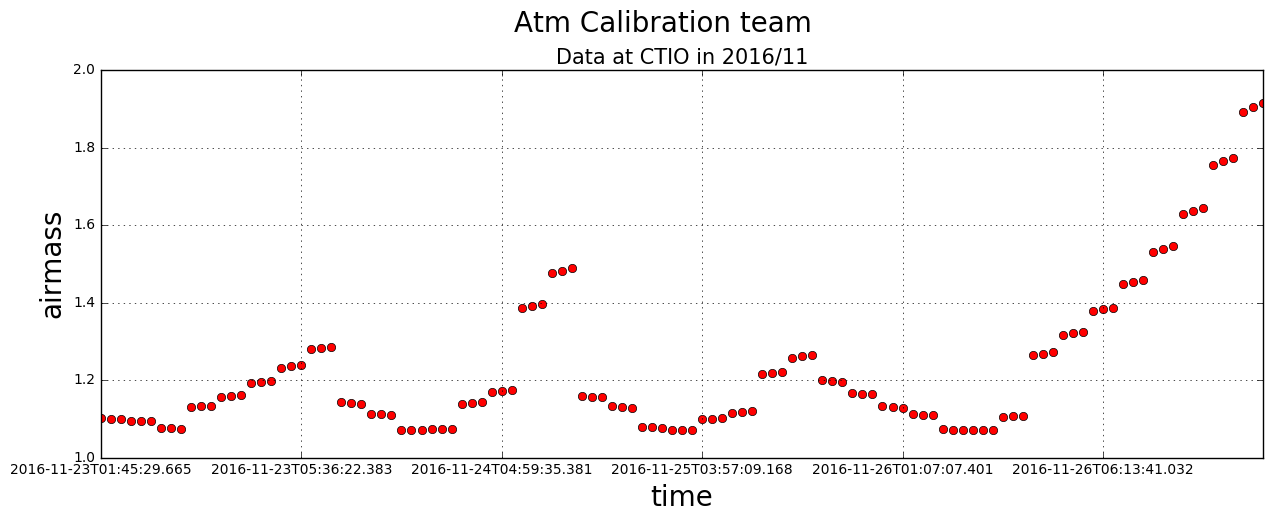

In [11]:
fig = plt.figure(figsize=(15,5), dpi=300)
ax=fig.add_subplot(111)
df_data.index=df_data['date']
df_data['airmass'].plot(lw=0,marker='o',color='red',subplots=True)
#ax=df_data.plot('date','airmass',subplots=True)
ax.set_xlabel('time',fontsize=20)
ax.set_ylabel('airmass',fontsize=20)
title= "Data at {} in 2016/{}".format(OBS_NAME,MONTH_NAME)
ax.set_title(title,fontsize=15)
fig.suptitle('Atm Calibration team', y=1.02, fontsize=20)
ax.grid(True)

In [12]:
anaatm_file='AnaAtmFromSpectra_HD14943.csv'

In [13]:
df_anaatm=pd.read_csv(anaatm_file)

In [14]:
df_anaatm.index=df_anaatm['date']
#df.rename(columns={"date": "dateold", "H2O(1000nm)": ""})

In [15]:
df_anaatm

,date,H20_1000nm,H20_900nm,clouds
date,,,,
2016-11-23T01:45:29.665,2016-11-23T01:45:29.665,0.984579,0.929947,0.984999
2016-11-23T01:46:33.179,2016-11-23T01:46:33.179,0.922622,0.884434,0.970806
2016-11-23T01:47:36.699,2016-11-23T01:47:36.699,0.988803,0.934643,0.982378
2016-11-23T01:52:00.166,2016-11-23T01:52:00.166,0.993283,0.937588,0.985852
2016-11-23T01:53:23.679,2016-11-23T01:53:23.679,1.001153,0.948530,0.988074
2016-11-23T01:54:47.200,2016-11-23T01:54:47.200,0.983377,0.926409,0.981397
2016-11-23T02:26:40.568,2016-11-23T02:26:40.568,0.975621,0.915398,0.975784
2016-11-23T02:28:04.083,2016-11-23T02:28:04.083,0.854278,0.808419,0.949174
2016-11-23T02:29:27.596,2016-11-23T02:29:27.596,0.965339,0.907103,0.974038


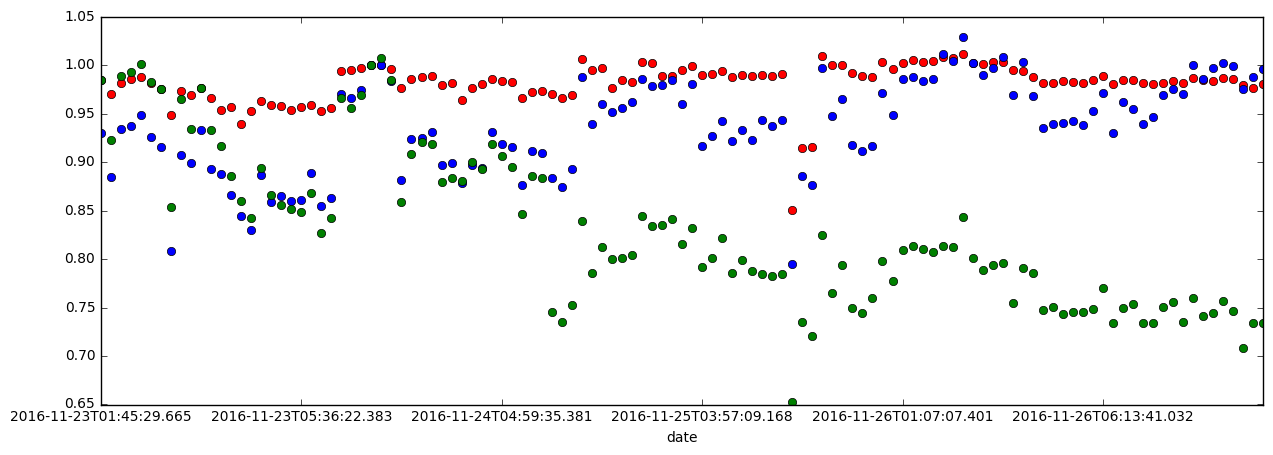

In [23]:
fig = plt.figure(figsize=(15,5), dpi=300)
ax=fig.add_subplot(111)
df_anaatm["clouds"].plot(lw=0,marker='o',color='red')
df_anaatm["H20_900nm"].plot(lw=0,marker='o',color='blue')
df_anaatm["H20_1000nm"].plot(lw=0,marker='o',color='green')
#df_anaatm.plot(lw=0,marker='o',color='blue',subplots=True)

In [ ]:
mydate=df_data['date'][0]
print mydate

In [ ]:
NDATATIMES=len(df_data['date'])

In [ ]:
pd.to_datetime(df_data['date'][0])

### convert in format without T

In [ ]:
new_date_format= [pd.to_datetime(df_data['date'][i]) for i in range(NDATATIMES)]

In [ ]:
new_date_format

In [ ]:
MONTH_NAME='11' # select november

In [ ]:
# SELECT OBSERVATORY
OBS_NAME='ctio'

In [ ]:
# The selected data field
DATA_NAME1 =  'tavg1_2d_csp_Nx_M2T1NXCSP'   # 
DATA_NAME2 =  'tavg1_2d_aer_Nx_M2T1NXAER'   # 
DATA_TAG1=['ISCCPCLDFRC','MDSH2OPATH','MDSICEPATH','MDSOPTHCKH2O','MDSOPTHCKICE','MDSOPTHCKTTL']
DATA_TAG2=['TOTANGSTR','TOTEXTTAU','TOTSCATAU']
DATA_TITLE1=['ISCCP Cloud area fraction',
            'MODIS H2O path',
            'MODIS ice path',
            'MODIS H2O optical thickness',
            'MODIS ice optical thickness',
            'MODIS total optical thickness'
           ]
DATA_TITLE2=['Total Aerosol Angstrom parameter 470-870 nm',
            'Total Aerosol Extinction AOT 550 nm',
            'Total Aerosol Scattering AOT 550 nm'
           ]

In [ ]:
pandas_filename_csp='MERRA2_2016_'+DATA_NAME1+'_'+OBS_NAME+'_'+MONTH_NAME+'.csv'
pandas_filename_aer='MERRA2_2016_'+DATA_NAME2+'_'+OBS_NAME+'_'+MONTH_NAME+'.csv'

In [ ]:
merra_csp=pd.read_csv(pandas_filename_csp)
merra_aer=pd.read_csv(pandas_filename_aer)

In [ ]:
merra_csp

In [ ]:
def PlotTimeSeries(df,data_name,data_title,figfile):
    print data_name
    print data_title
    fig = plt.figure(figsize=(15,5), dpi=300)
    ax=fig.add_subplot(111)
    df.index=df['time']
    df[data_name].plot(lw=3,color='red',subplots=True)
    #df_data['airmass'].plot(lw=0,marker='o',color='black',subplots=True)
    #df.plot(x='time', y=data_name,lw=3,color='red',subplots=True)
    ax.set_xlabel('time',fontsize=20)
    ax.set_ylabel(data_name,fontsize=20)
    title= "Hourly {} at {} in 2016/{}".format(data_title,OBS_NAME,MONTH_NAME)
    ax.set_title(title,fontsize=15)
    fig.suptitle('NASA GMAO GES (MERRA-2)', y=1.02, fontsize=20)
    ax.grid(True)
    #plt.savefig(figfile)

In [ ]:
PlotTimeSeries(merra_csp,DATA_TAG1[0],DATA_TITLE1[0],'img0.pdf')

In [ ]:
PlotTimeSeries(merra_csp,DATA_TAG1[1],DATA_TITLE1[1],'img1.pdf')

In [ ]:
PlotTimeSeries(merra_csp,DATA_TAG1[2],DATA_TITLE1[2],'img2.pdf')

In [ ]:
PlotTimeSeries(merra_csp,DATA_TAG1[3],DATA_TITLE1[3],'img3.pdf')

In [ ]:
PlotTimeSeries(merra_csp,DATA_TAG1[4],DATA_TITLE1[4],'img4.pdf')

In [ ]:
PlotTimeSeries(merra_csp,DATA_TAG1[5],DATA_TITLE1[5],'img5.pdf')

In [ ]:
PlotTimeSeries(merra_aer,DATA_TAG2[0],DATA_TITLE2[0],'img6.pdf')

In [ ]:
PlotTimeSeries(merra_aer,DATA_TAG2[1],DATA_TITLE2[1],'img7.pdf')

In [ ]:
PlotTimeSeries(merra_aer,DATA_TAG2[1],DATA_TITLE2[1],'img8.pdf')

### Merra time

In [ ]:
merra_timestamp=pd.to_datetime(merra_csp['time'])

In [ ]:
TimeDiff=(np.abs(merra_timestamp-new_date_format[0]))

In [ ]:
NBTIMEMERRA=len(TimeDiff)

In [ ]:
TimeDiff.min()

In [ ]:
(np.abs(merra_timestamp-new_date_format[0])).min()

In [ ]:
timeshift= [TimeDiff[i].total_seconds() for i in range(NBTIMEMERRA) ]

In [ ]:
plt.plot(timeshift)

In [ ]:
themin=np.array(timeshift).min()

In [ ]:
indexmin=np.where(timeshift==themin)[0]

In [ ]:
TimeDiff[indexmin]

In [ ]:
def GetMerraIndex():
    merra_indexes = []
    for i in range(NDATATIMES): # loop on data
        TimeDiff=(np.abs(merra_timestamp-new_date_format[i])) # compute the time difference merra- data
        NBTIMEMERRA=len(TimeDiff)
        timeshift= [TimeDiff[i].total_seconds() for i in range(NBTIMEMERRA) ]
        themin=np.array(timeshift).min()
        indexmin=np.where(timeshift==themin)[0]
        merra_indexes.append(indexmin[0])
    return np.array(merra_indexes)    

In [ ]:
the_merra_indexes=GetMerraIndex()

In [ ]:
merra_time_indexes=merra_csp['time'][the_merra_indexes]
ypoints=np.ones(NDATATIMES)*0.5
ts=pd.Series(ypoints,index=merra_time_indexes)

In [ ]:
flags=np.zeros(NBTIMEMERRA)
flags[the_merra_indexes]=1

In [ ]:
ts=pd.Series(flags,index=merra_csp['time'])

In [ ]:
plt.figure(figsize=(20,5))
ts.plot(marker='o',lw=1,color='black')
plt.grid(True)

In [ ]:
def PlotTimeSeries2(df,data_name,data_title,figfile,datatime):
    print data_name
    print data_title
    fig = plt.figure(figsize=(15,5), dpi=300)
    ax=fig.add_subplot(111)
    df.index=df['time']
    df[data_name].plot(lw=3,color='red',label='merra2')
    datatime.plot(marker='o',lw=1,color='black',label='data')
    datatime.plot()
    ax.set_xlabel('time',fontsize=20)
    ax.set_ylabel(data_name,fontsize=20)
    title= "Hourly {} at {} in 2016/{}".format(data_title,OBS_NAME,MONTH_NAME)
    ax.set_title(title,fontsize=15)
    fig.suptitle('NASA GMAO GES (MERRA-2)', y=1.02, fontsize=20)
    ax.grid(True)
    #plt.savefig(figfile)

In [ ]:
PlotTimeSeries2(merra_csp,DATA_TAG1[0],DATA_TITLE1[0],'img9.pdf',ts)